<a href="https://colab.research.google.com/github/emily0622/Python-Projects/blob/main/CognitiveAICourse/Cognitive6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practiced implementing K-Means Clustering

In [28]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

np.random.seed(0)


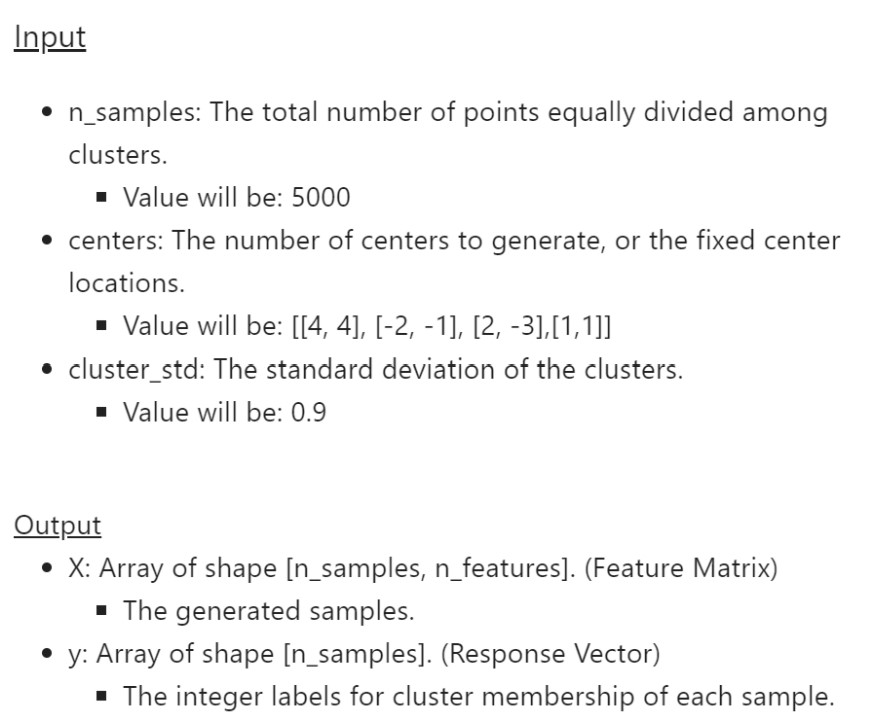

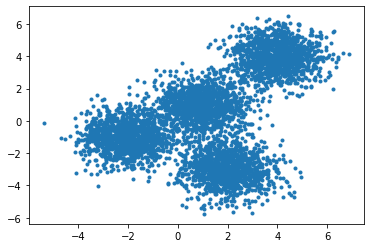

In [29]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')


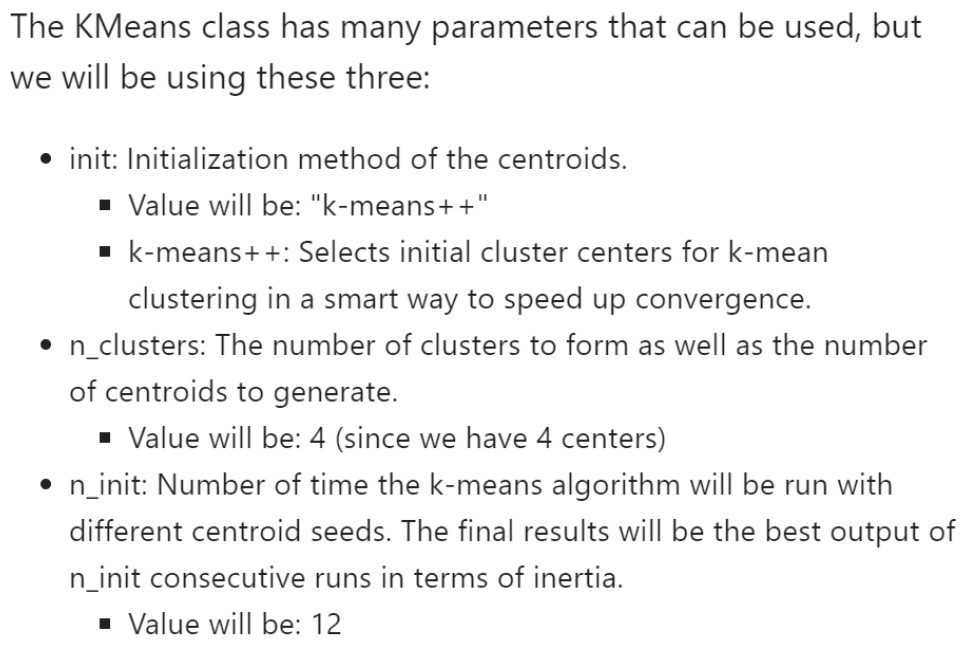

In [30]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

k_means_labels = k_means.labels_
k_means_labels
#output:
#array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers


array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

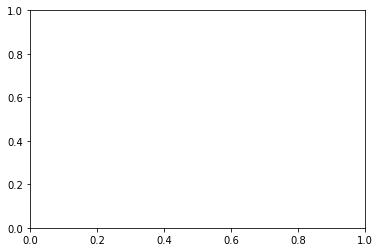

In [31]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)


In [32]:
# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)


In [33]:
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


Customer Segmentation with K-Means

In [34]:
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv

import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

df = cust_df.drop('Address', axis=1)
df.head()


--2021-10-08 03:19:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K   215KB/s    in 0.2s    

2021-10-08 03:19:20 (215 KB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Normalize the dataset because normalizing is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. Typically StandardScaler() is used to normalize.

In [35]:
X = df.values[:,1:] #because first row is just counting rows
X = np.nan_to_num(X) #removes NaN
Clus_dataSet = preprocessing.StandardScaler().fit_transform(X)
Clus_dataSet

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

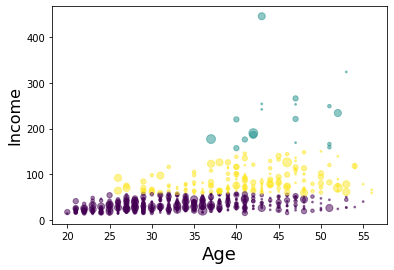

In [36]:
#we add our own column for the labels
df["Clus_km"] = labels
df.head(5)

#check the cluster location by averaging the groups
df.groupby('Clus_km').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


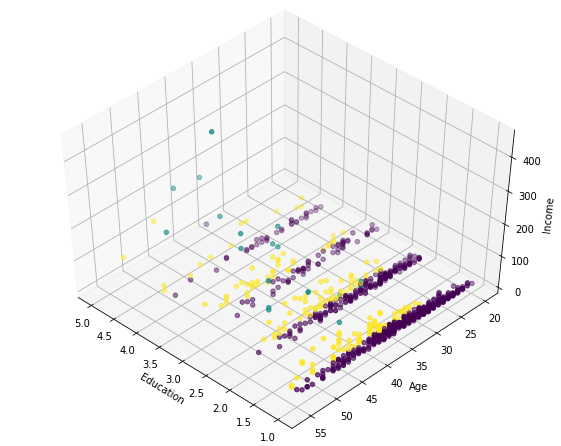

In [37]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()  #clears figure
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134) #parameters are for appearance of graph

plt.cla() #clears axis
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))